In [ ]:
import pandas as pd
import numpy as np

In [ ]:
gini = pd.read_csv('API_SI.POV.GINI_DS2_en_csv_v2_296215.csv')
gini.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,51.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop the 'Unnamed: 69' column if it exists and is irrelevant
if 'Unnamed: 69' in gini.columns:
    gini = gini.drop(columns=['Unnamed: 69'])

# Identify the columns that represent years (they are numeric strings)
year_columns = [col for col in gini.columns if col.isdigit() ]

# Identify the identifier columns
id_vars = [col for col in gini.columns if col not in year_columns]

# Melt the DataFrame to transform year columns into rows
gini_tidy = gini.melt(id_vars=id_vars, value_vars=year_columns, var_name='year', value_name='gini_value')

# Convert 'year' column to integer type
gini_tidy['year'] = pd.to_numeric(gini_tidy['year'])

# Display the head of the tidied DataFrame
display(gini_tidy.head())

,Country Name,Country Code,Indicator Name,Indicator Code,year,gini_value
0,Aruba,ABW,Gini index,SI.POV.GINI,1960,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,1960,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,1960,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,1960,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,1960,NaN


The `gini_tidy` DataFrame now has a 'year' column, making it easier to analyze time-series data for Gini index values.

In [ ]:
# Filter out rows with NaN gini_value
gini_no_nan = gini_tidy.dropna(subset=['gini_value'])

# Find the highest year for each country and use it to filter
gini_plot_data = gini_no_nan.loc[gini_no_nan.groupby('Country Name')['year'].idxmax()]

print(f"Data for the highest available year per country:")
print(gini_plot_data.shape)
gini_plot_data.head()

Data for the highest available year per country:
(171, 6)


,Country Name,Country Code,Indicator Name,Indicator Code,year,gini_value
15965,Albania,ALB,Gini index,SI.POV.GINI,2020,29.4
13626,Algeria,DZA,Gini index,SI.POV.GINI,2011,27.6
15432,Angola,AGO,Gini index,SI.POV.GINI,2018,51.3
17033,Argentina,ARG,Gini index,SI.POV.GINI,2024,42.4
16768,Armenia,ARM,Gini index,SI.POV.GINI,2023,27.2


In [ ]:
gini_plot_data.gini_value.min(), gini_plot_data.gini_value.max()

(23.8, 63.0)

In [ ]:
import plotly.express as px

# Create the choropleth map for gini value of country
fig = px.choropleth(
    gini_plot_data,
    locations='Country Code',
    color='gini_value',
    hover_name='Country Name',
    color_continuous_scale = [(0.0, "#2166ac"), (0.5, "#f7f7f7"), (1.0, "#b2182b")], #'spectral_r', # Changed colorscale to blue-to-red
    range_color=[20, 60],
    title='LatestGlobal Gini Index (Blue to Red: 20 to 60)',
    # projection='natural earth'
)

fig.update_layout(
    title={
        'text': "Global Gini Index (Latest Available Year)",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24)
    },
    margin=dict(l=20, r=20, t=80, b=20),
    width=1500,       # Size control
    height=800,       # Size control
    paper_bgcolor='white',
)

# --------- Improve country borders ----------
fig.update_geos(
    showcountries=True,
    countrycolor="rgba(80,80,80,0.4)",
    showcoastlines=True,
    coastlinecolor="rgba(50,50,50,0.4)",
    projection_scale=0.95,
)

# --------- Improve colorbar ----------
fig.update_coloraxes(
    colorbar=dict(
        title="Gini Index",
        tickvals=[20, 30, 40, 50, 60],
        ticks="outside",
        len=0.75,
        thickness=20,
    )
)
px.sav
fig.show()

In [134]:
import plotly.express as px

fig = px.choropleth_map(gini_plot_data, geojson='Country Code', locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           map_style="carto-positron",
                           zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'year', 'gini_value'] but received: fips

In [ ]:
import plotly.express as px

# Create the choropleth map for gini value of country
fig = px.choropleth(
    gini_plot_data,
    locations='Country Code',
    color='gini_value',
    hover_name='Country Name',
    color_continuous_scale='spectral_r', # Changed colorscale to blue-to-red
    range_color=[20, 60],
    title='LatestGlobal Gini Index (Blue to Red: 20 to 60)',
    projection='natural earth'
)

fig.show()

In [ ]:
from pandas_datareader import data, wb

start_year = 1990
end_year = 2024
countries = ['USA','IND','CHN','BRA','ZAF', 'NLD']  # ISO3 codes accepted
# Indicators dictionary
indicators = {
    'NY.GDP.PCAP.KD': 'gdp_percap_const',
    'SL.UEM.TOTL.ZS': 'unemployment_pct',
    'FP.CPI.TOTL.ZG': 'inflation_pct',
    'NY.GNP.MKTP.CD': 'national_income',
    'NE.TRD.GNFS.ZS': 'trade_openness',
    'SL.TLF.ADVN.ZS': 'education_atainment',
    'NE.TRD.GNFS.ZS': 'trade_pct_gdp',
    'SP.POP.TOTL': 'population'
}

from functools import reduce
frames = []
for code, name in indicators.items():
    print('Downloading', code)
    try:
        # Use wb.download, which is more robust for World Bank data and accepts 'country'
        df = wb.download(indicator=code, country=countries, start=start_year, end=end_year)
        df = df.reset_index() # country and year become columns

        # Rename columns: the indicator code to its friendly name, and 'country' to 'country_name'
        df = df.rename(columns={'country': 'country_name', code: name})

        frames.append(df[['country_name','year', name]])
    except Exception as e:
        print('Failed to fetch', code, ' — ', e)

if frames:
    indicators_df = reduce(lambda left, right: pd.merge(left, right, on=['country_name','year'], how='outer'), frames)
else:
    raise RuntimeError('No data frames fetched. Please download CSVs manually.')

indicators_df.sort_values(['country_name','year'], inplace=True)

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/3255671260.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/3255671260.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/3255671260.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/3255671260.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/tmp/ipython-input-3118683729.py:23: FutureWarning:
/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/3255671260.py:22: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

/tmp/ipython-input-3118683729.py:23: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/tmp/ipython-input-3118683729.py:23: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/tmp/ipython-input-3118683729.py:23: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/2895079595.py:25: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/2895079595.py:25: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/2895079595.py:25: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



/var/folders/nf/h6pl836x6_39vqhbwflhx77w0000gn/T/ipykernel_90943/2895079595.py:25: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [ ]:
indicators_df['year'] = pd.to_numeric(indicators_df['year'])
print(indicators_df.shape)
indicators_df.head()

(210, 7)


,country_name,year,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,population
0,Brazil,1990,6149.867889,NaN,2947.732772,3.747265e+11,15.155599,149143223
1,Brazil,1991,6107.648837,6.894,432.786662,3.348580e+11,16.592078,151724256
2,Brazil,1992,5973.982856,7.086,951.962053,3.220009e+11,19.253375,154275079
3,Brazil,1993,6167.460922,6.030,1927.380790,3.593261e+11,19.599321,156794577
4,Brazil,1994,6427.169019,6.578,2075.888398,5.051789e+11,18.674760,159265006


,country_name,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,population
0,Brazil,1990,6149.867889,NaN,2947.732772,15.155599,149143223
1,Brazil,1991,6107.648837,6.894,432.786662,16.592078,151724256
2,Brazil,1992,5973.982856,7.086,951.962053,19.253375,154275079
3,Brazil,1993,6167.460922,6.030,1927.380790,19.599321,156794577
4,Brazil,1994,6427.169019,6.578,2075.888398,18.674760,159265006


In [ ]:
indicators_df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

---
# Inequality Data

In [ ]:
ind_df = pd.read_csv("WID_data_IN.csv", sep=";")
bzl_df = pd.read_csv("WID_data_BR.csv", sep=";")
usa_df = pd.read_csv("WID_data_US.csv", sep=";")
chn_df = pd.read_csv("WID_data_CN.csv", sep=";")
nld_df = pd.read_csv("WID_data_NL.csv", sep=";")
saf_df = pd.read_csv("WID_data_ZA.csv", sep=";")

print(f"Shape of India DataFrame: {ind_df.shape}")
print(f"Shape of Brazil DataFrame: {bzl_df.shape}")
print(f"Shape of USA DataFrame: {usa_df.shape}")
print(f"Shape of China DataFrame: {chn_df.shape}")
print(f"Shape of Netherlands DataFrame: {nld_df.shape}")
print(f"Shape of South Africa DataFrame: {saf_df.shape}")

Shape of India DataFrame: (734991, 7)
Shape of Brazil DataFrame: (543551, 7)
Shape of USA DataFrame: (1215596, 7)
Shape of China DataFrame: (580914, 7)
Shape of Netherlands DataFrame: (757711, 7)
Shape of South Africa DataFrame: (930128, 7)


WID variable codes follow a structured format:

- **s** → Share (the variable measures a share of income/wealth).
- **ptinc** → Pretax income (income before taxes and transfers).
- **j** → Equal-split adults (income is split equally between partners in a household).
- **992 vs. 999** → Age group codes:
    - 992 = Adults only (age 20+)
    - 999 = All ages (entire population, including children)

In [ ]:
ind_df['variable'].unique()
ind_df_filtered = ind_df[ind_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
bzl_df_filtered = bzl_df[bzl_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
usa_df_filtered = usa_df[usa_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
chn_df_filtered = chn_df[chn_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
nld_df_filtered = nld_df[nld_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)
saf_df_filtered = saf_df[saf_df['variable'].str.lower().str.startswith("sptincj999")].reset_index(drop=True)

print(f"Filtered Shape of India DataFrame: {ind_df_filtered.shape}")
print(f"Filtered Shape of Brazil DataFrame: {bzl_df_filtered.shape}")
print(f"Filtered Shape of USA DataFrame: {usa_df_filtered.shape}")
print(f"Filtered Shape of China DataFrame: {chn_df_filtered.shape}")
print(f"Filtered Shape of Netherlands DataFrame: {nld_df_filtered.shape}")
print(f"Filtered Shape of South Africa DataFrame: {saf_df_filtered.shape}")
df_combined = pd.concat([ind_df_filtered, bzl_df_filtered, usa_df_filtered, chn_df_filtered, nld_df_filtered, saf_df_filtered], ignore_index=True)
print(f"Combined DataFrame Shape: {df_combined.shape}")
print(f"Sample data from combined DataFrame:\n{df_combined.head(5)}")

Filtered Shape of India DataFrame: (32141, 7)
Filtered Shape of Brazil DataFrame: (21686, 7)
Filtered Shape of USA DataFrame: (45289, 7)
Filtered Shape of China DataFrame: (22457, 7)
Filtered Shape of Netherlands DataFrame: (21672, 7)
Filtered Shape of South Africa DataFrame: (21692, 7)
Combined DataFrame Shape: (164937, 7)
Sample data from combined DataFrame:
  country    variable percentile  year   value  age pop
0      IN  sptincj999     p4p100  1820  0.9911  999   j
1      IN  sptincj999     p4p100  1850  0.9922  999   j
2      IN  sptincj999     p4p100  1880  0.9982  999   j
3      IN  sptincj999     p4p100  1900  0.9982  999   j
4      IN  sptincj999     p4p100  1910  0.9919  999   j


In [ ]:
df_combined[['p_start', 'p_end']] = df_combined['percentile'].str.extract(r'p(\d+\.?\d*)p(\d+\.?\d*)').astype("float")
df_combined.head()

,country,variable,percentile,year,value,age,pop,p_start,p_end
0,IN,sptincj999,p4p100,1820,0.9911,999,j,4.0,100.0
1,IN,sptincj999,p4p100,1850,0.9922,999,j,4.0,100.0
2,IN,sptincj999,p4p100,1880,0.9982,999,j,4.0,100.0
3,IN,sptincj999,p4p100,1900,0.9982,999,j,4.0,100.0
4,IN,sptincj999,p4p100,1910,0.9919,999,j,4.0,100.0


In [ ]:
# Filtering top 10%, top 1%, top 0.1%, and bottom 50%
top_10 = df_combined[(df_combined['p_start'] == 90) & (df_combined['p_end'] == 100)].reset_index(drop=True)
top_1 = df_combined[(df_combined['p_start'] == 99) & (df_combined['p_end'] == 100)].reset_index(drop=True)
top_0_1 = df_combined[(df_combined['p_start'] == 99.9) & (df_combined['p_end'] == 100)].reset_index(drop=True)
bottom_50 = df_combined[(df_combined['p_start'] == 0) & (df_combined['p_end'] == 50)].reset_index(drop=True)

df_income_summary = pd.concat([top_10, top_1, top_0_1, bottom_50], ignore_index=True)
df_income_summary['income_distribution'] = np.where(df_income_summary['p_start'] == 90, 'top_10%',
                                        np.where(df_income_summary['p_start'] == 99, 'top_1%',
                                        np.where(df_income_summary['p_start'] == 99.9, 'top_0.1%',
                                        np.where(df_income_summary['p_start'] == 0, 'bottom_50%', 'other'))))
df_income_summary

,country,variable,percentile,year,value,age,pop,p_start,p_end,income_distribution
0,IN,sptincj999,p90p100,1820,0.4800,999,j,90.0,100.0,top_10%
1,IN,sptincj999,p90p100,1850,0.5000,999,j,90.0,100.0,top_10%
2,IN,sptincj999,p90p100,1880,0.5460,999,j,90.0,100.0,top_10%
3,IN,sptincj999,p90p100,1900,0.5376,999,j,90.0,100.0,top_10%
4,IN,sptincj999,p90p100,1910,0.4480,999,j,90.0,100.0,top_10%
...,...,...,...,...,...,...,...,...,...,...
1699,ZA,sptincj999,p0p50,2020,0.0627,999,j,0.0,50.0,bottom_50%
1700,ZA,sptincj999,p0p50,2021,0.0627,999,j,0.0,50.0,bottom_50%
1701,ZA,sptincj999,p0p50,2022,0.0627,999,j,0.0,50.0,bottom_50%
1702,ZA,sptincj999,p0p50,2023,0.0627,999,j,0.0,50.0,bottom_50%


In [ ]:
df_wide = df_income_summary.pivot_table(
    index=['country','year'],
    columns='income_distribution',
    values='value'
).reset_index(drop=False)
df_wide

income_distribution,country,year,bottom_50%,top_0.1%,top_1%,top_10%
0,BR,1820,0.1173,0.0970,0.2348,0.5324
1,BR,1850,0.1159,0.0977,0.2373,0.5380
2,BR,1880,0.1145,0.0984,0.2397,0.5436
3,BR,1900,0.1131,0.0990,0.2422,0.5492
4,BR,1910,0.1103,0.1003,0.2472,0.5605
...,...,...,...,...,...,...
421,ZA,2020,0.0627,0.0574,0.1921,0.6508
422,ZA,2021,0.0627,0.0574,0.1921,0.6508
423,ZA,2022,0.0627,0.0574,0.1921,0.6508
424,ZA,2023,0.0627,0.0574,0.1921,0.6508


In [ ]:
inequality_df = df_wide[(df_wide['year'] >= 1990) & (df_wide['year'] <= 2024)]
inequality_df.rename(columns={'country': 'country_code'}, inplace=True)
inequality_df.head(20)

/tmp/ipython-input-4278397467.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



income_distribution,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%
21,BR,1990,0.0912,0.1279,0.2724,0.5861
22,BR,1991,0.0912,0.1279,0.2724,0.5861
23,BR,1992,0.0912,0.1279,0.2724,0.5861
24,BR,1993,0.0912,0.1279,0.2724,0.5861
25,BR,1994,0.0912,0.1279,0.2724,0.5861
26,BR,1995,0.0912,0.1279,0.2724,0.5861
27,BR,1996,0.0912,0.1279,0.2724,0.5861
28,BR,1997,0.0912,0.1279,0.2724,0.5861
29,BR,1998,0.0912,0.1279,0.2724,0.5861
30,BR,1999,0.0912,0.1279,0.2724,0.5861


In [ ]:
# #--------------FOR Checking countries Data ------------------------
# test_df = indicators_df[indicators_df['country_code'] == 'US']
# test_df.year = pd.to_numeric(test_df['year'])
# print(test_df.shape)
# test_df[:50]

In [ ]:
country_name_to_code_map = {
    'Brazil': 'BR',
    
    'India': 'IN',
    'United States': 'US',
    'China': 'CN',
    'Netherlands': 'NL',
    'South Africa': 'ZA'
}
indicators_df.rename(columns={'country_name': 'country'}, inplace=True)

indicators_df['country_code'] = indicators_df['country'].replace(country_name_to_code_map)
print(indicators_df.shape)
indicators_df.head()

(210, 8)


,country,year,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,population,country_code
0,Brazil,1990,6149.867889,NaN,2947.732772,15.155599,149143223,Brazil
1,Brazil,1991,6107.648837,6.894,432.786662,16.592078,151724256,Brazil
2,Brazil,1992,5973.982856,7.086,951.962053,19.253375,154275079,Brazil
3,Brazil,1993,6167.460922,6.030,1927.380790,19.599321,156794577,Brazil
4,Brazil,1994,6427.169019,6.578,2075.888398,18.674760,159265006,Brazil


In [ ]:
indicators_df.year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024])

In [ ]:
indicators_df.country.unique()

array(['Brazil', 'China', 'India', 'Netherlands', 'South Africa',
       'United States'], dtype=object)

In [ ]:
# Now attempt the merge again
df_merge = pd.merge(inequality_df, indicators_df, on=['country_code', 'year'])

# Print head of the merged dataframe to verify
print(df_merge.shape)
df_merge.head()

(175, 12)


,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%,country,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,population
0,CN,1990,0.2146,0.0319,0.0821,0.3085,China,917.270662,NaN,NaN,3.625239e+11,24.225982,1135185000
1,CN,1991,0.2027,0.0328,0.0842,0.3150,China,989.548541,2.37,NaN,3.852892e+11,25.872981,1150780000
2,CN,1992,0.1939,0.0343,0.0885,0.3271,China,1117.273295,2.37,NaN,4.287159e+11,30.034094,1164970000
3,CN,1993,0.1849,0.0359,0.0929,0.3390,China,1258.349461,2.69,NaN,4.456360e+11,35.908642,1178440000
4,CN,1994,0.1811,0.0371,0.0954,0.3433,China,1406.858457,2.90,24.25699,5.658946e+11,35.605464,1191835000


,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%,country,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,population
0,CN,1990,0.2146,0.0319,0.0821,0.3085,China,917.270662,NaN,NaN,24.225982,1135185000
1,CN,1991,0.2027,0.0328,0.0842,0.3150,China,989.548541,2.37,NaN,25.872981,1150780000
2,CN,1992,0.1939,0.0343,0.0885,0.3271,China,1117.273295,2.37,NaN,30.034094,1164970000
3,CN,1993,0.1849,0.0359,0.0929,0.3390,China,1258.349461,2.69,NaN,35.908642,1178440000
4,CN,1994,0.1811,0.0371,0.0954,0.3433,China,1406.858457,2.90,24.25699,35.605464,1191835000


In [ ]:
df_merge.isna().sum()

,0
country_code,0
year,0
bottom_50%,0
top_0.1%,0
top_1%,0
top_10%,0
country,0
gdp_percap_const,0
unemployment_pct,5
inflation_pct,4


country_code        0
year                0
bottom_50%          0
top_0.1%            0
top_1%              0
top_10%             0
country             0
gdp_percap_const    0
unemployment_pct    5
inflation_pct       4
trade_pct_gdp       0
population          0
dtype: int64

In [ ]:
df_merge['inflation_pct'] = df_merge.groupby('country')['inflation_pct'].transform(lambda x: x.ffill().bfill())
df_merge['unemployment_pct'] = df_merge.groupby('country')['unemployment_pct'].transform(lambda x: x.ffill().bfill())
# df_merge['edu_spend_pct_gdp'] = df_merge.groupby('country')['edu_spend_pct_gdp'].transform(lambda x: x.ffill().bfill())
missing_inflation_pct_count = df_merge['inflation_pct'].isnull().sum()
print(f"Number of missing 'inflation_pct' values before filling: {missing_inflation_pct_count}")
print("Missing 'inflation_pct' values after filling:", df_merge['inflation_pct'].isnull().sum())

Number of missing 'inflation_pct' values before filling: 0
Missing 'inflation_pct' values after filling: 0


In [ ]:
df_merge

,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%,country,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,population
0,CN,1990,0.2146,0.0319,0.0821,0.3085,China,917.270662,2.370,24.256990,3.625239e+11,24.225982,1135185000
1,CN,1991,0.2027,0.0328,0.0842,0.3150,China,989.548541,2.370,24.256990,3.852892e+11,25.872981,1150780000
2,CN,1992,0.1939,0.0343,0.0885,0.3271,China,1117.273295,2.370,24.256990,4.287159e+11,30.034094,1164970000
3,CN,1993,0.1849,0.0359,0.0929,0.3390,China,1258.349461,2.690,24.256990,4.456360e+11,35.908642,1178440000
4,CN,1994,0.1811,0.0371,0.0954,0.3433,China,1406.858457,2.900,24.256990,5.658946e+11,35.605464,1191835000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,ZA,2020,0.0627,0.0574,0.1921,0.6508,South Africa,5569.584833,29.217,3.232388,3.323488e+11,50.759659,60562381
171,ZA,2021,0.0627,0.0574,0.1921,0.6508,South Africa,5756.195494,34.007,4.618745,4.128645e+11,56.034714,61502603
172,ZA,2022,0.0627,0.0574,0.1921,0.6508,South Africa,5783.860904,33.268,7.039873,3.984537e+11,64.783002,62378410
173,ZA,2023,0.0627,0.0574,0.1921,0.6508,South Africa,5747.419650,32.098,6.075244,3.755332e+11,65.180096,63212384


,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%,country,gdp_percap_const,unemployment_pct,inflation_pct,trade_pct_gdp,population
0,CN,1990,0.2146,0.0319,0.0821,0.3085,China,917.270662,2.370,24.256990,24.225982,1135185000
1,CN,1991,0.2027,0.0328,0.0842,0.3150,China,989.548541,2.370,24.256990,25.872981,1150780000
2,CN,1992,0.1939,0.0343,0.0885,0.3271,China,1117.273295,2.370,24.256990,30.034094,1164970000
3,CN,1993,0.1849,0.0359,0.0929,0.3390,China,1258.349461,2.690,24.256990,35.908642,1178440000
4,CN,1994,0.1811,0.0371,0.0954,0.3433,China,1406.858457,2.900,24.256990,35.605464,1191835000
...,...,...,...,...,...,...,...,...,...,...,...,...
170,ZA,2020,0.0627,0.0574,0.1921,0.6508,South Africa,5569.584833,29.217,3.232388,50.759659,60562381
171,ZA,2021,0.0627,0.0574,0.1921,0.6508,South Africa,5756.195494,34.007,4.618745,56.034714,61502603
172,ZA,2022,0.0627,0.0574,0.1921,0.6508,South Africa,5783.860904,33.268,7.039873,64.783002,62378410
173,ZA,2023,0.0627,0.0574,0.1921,0.6508,South Africa,5747.419650,32.098,6.075244,65.180096,63212384


In [130]:
df_merge[df_merge['country_code']=='ZA'].isna().sum()

country_code            0
year                    0
bottom_50%              0
top_0.1%                0
top_1%                  0
top_10%                 0
country                 0
gdp_percap_const        0
unemployment_pct        0
inflation_pct           0
national_income         0
trade_pct_gdp           0
education_atainment    11
population              0
dtype: int64

In [ ]:
df_merge.isna().sum()

,0
country_code,0
year,0
bottom_50%,0
top_0.1%,0
top_1%,0
top_10%,0
country,0
gdp_percap_const,0
unemployment_pct,0
inflation_pct,0


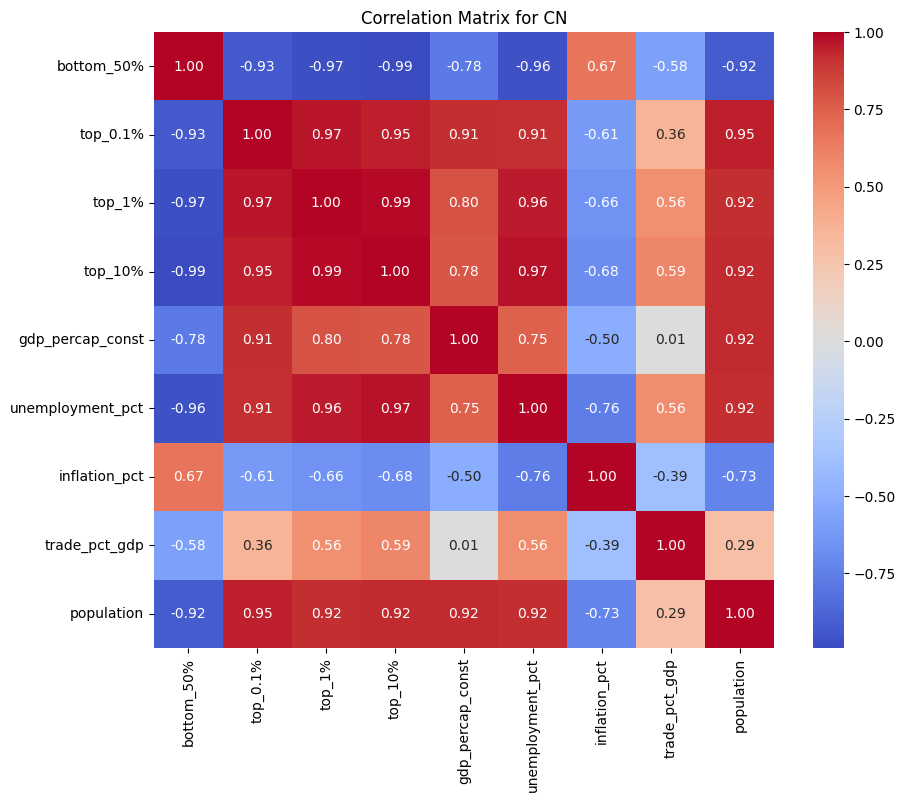

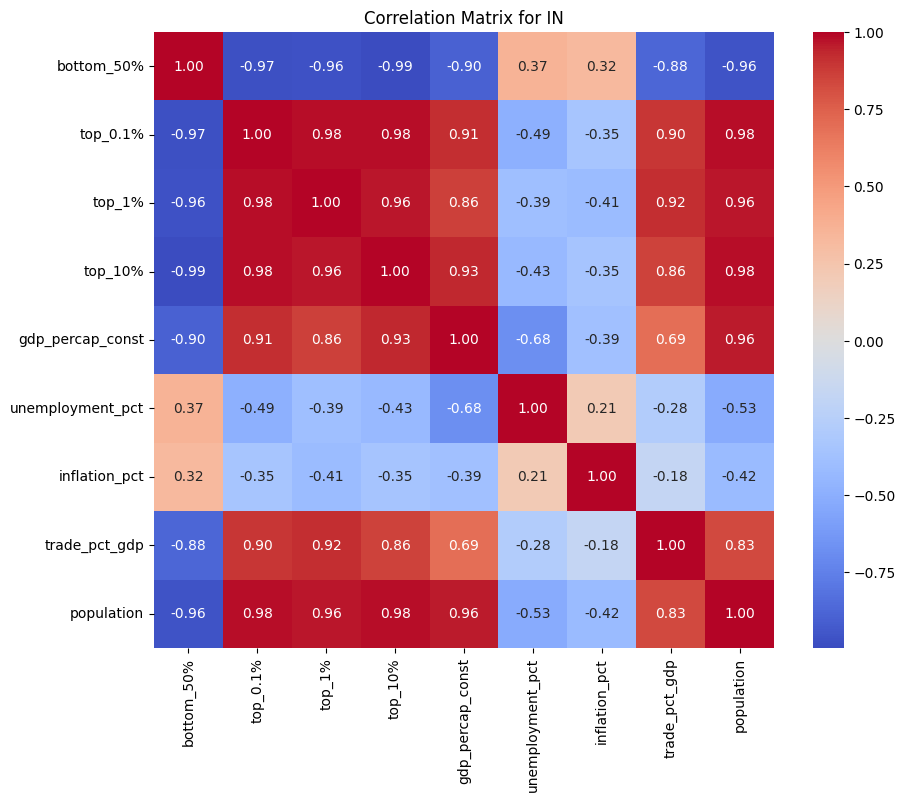

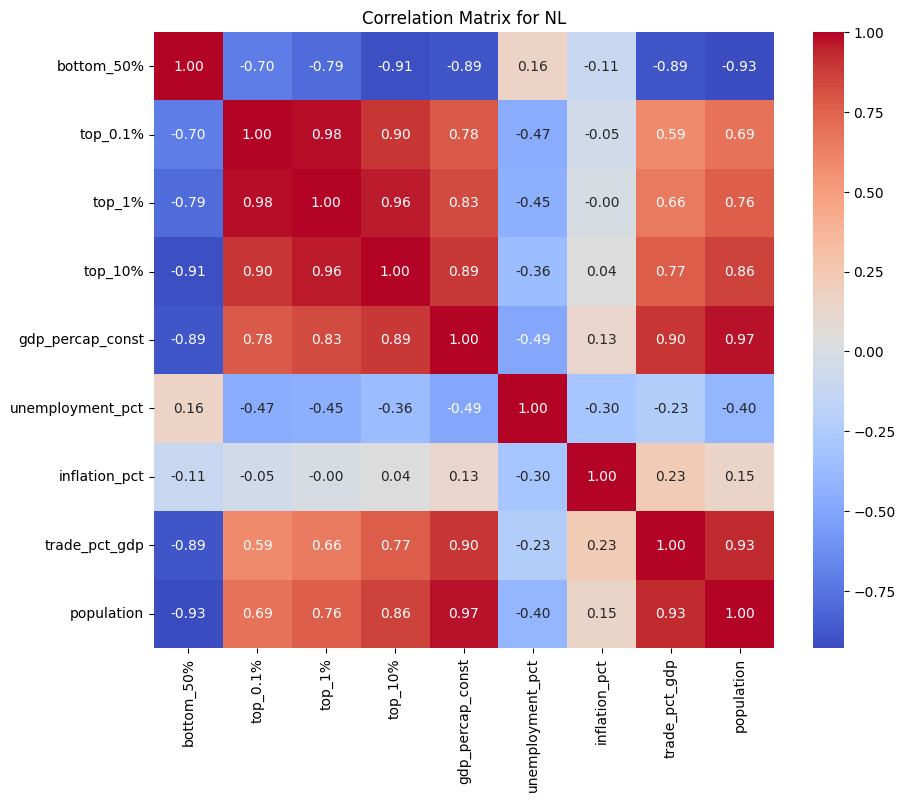

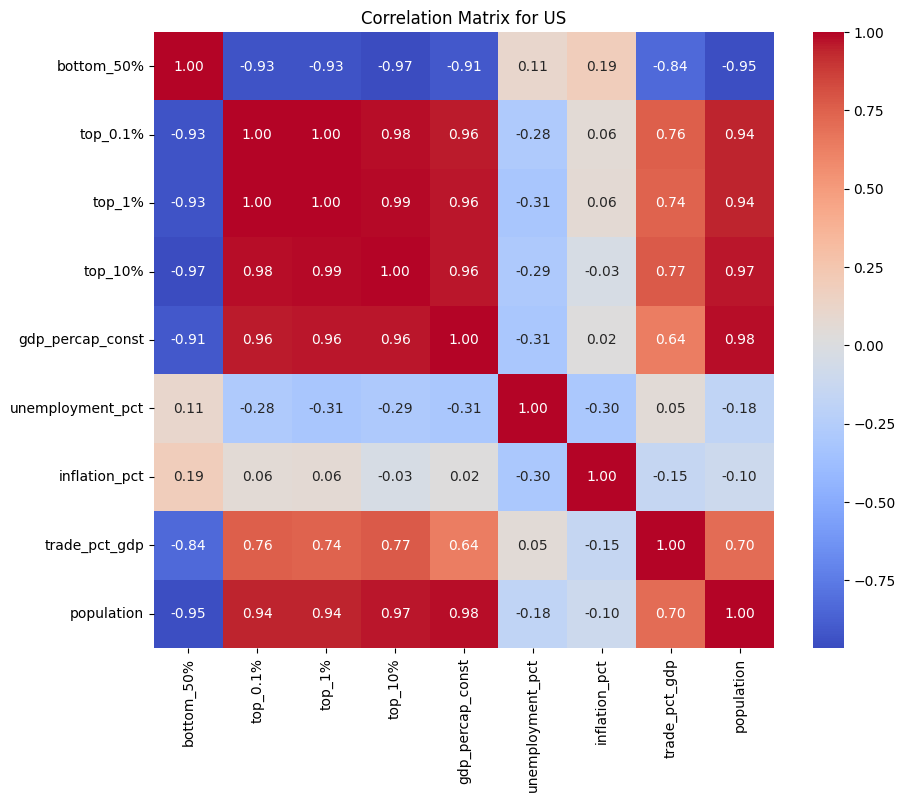

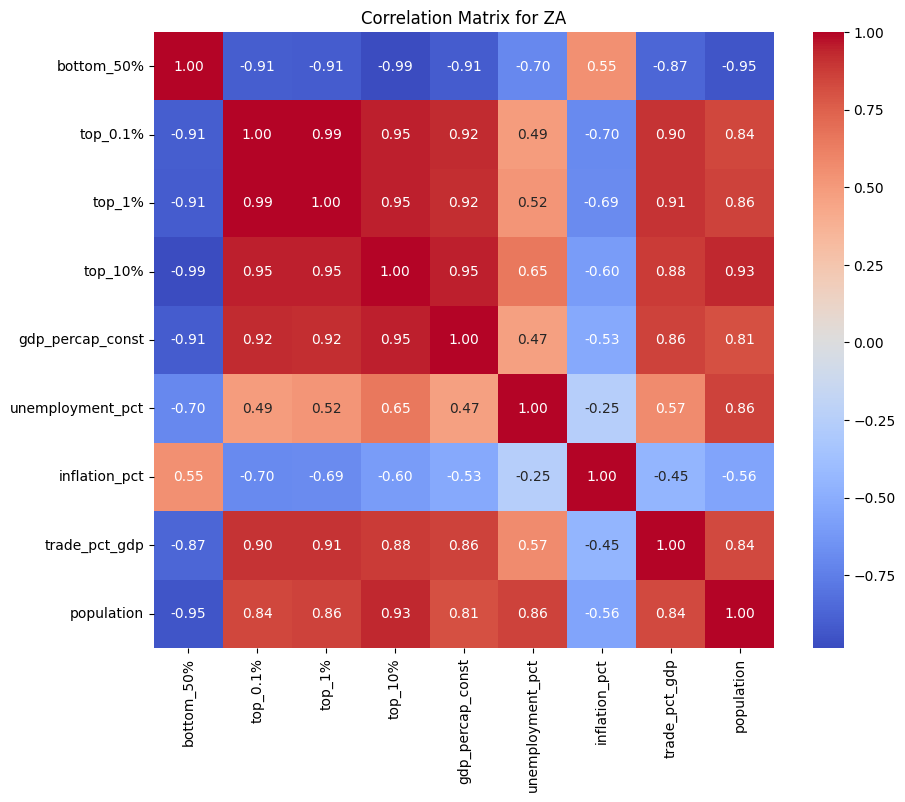

In [ ]:
import matplotlib.pyplot as plt

# plot correlation matrix for all the features
import seaborn as sns

for code in df_merge['country_code'].unique():
    country_data = df_merge[df_merge['country_code'] == code]
    df_corr = country_data.drop(columns=['country_code', 'year', 'country']) # Drop non-numeric columns for correlation
    # plot correlation matrix for all the features
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    
    plt.title(f'Correlation Matrix for {code}')
    plt.savefig(f"correlation_{code}.png")
    plt.show()



- Check steps to do for EDA (refer sample)
- Build skeletal for ML (Linear Regression OLS and RANSAC (maybe)) and prediction and its analysis (with visualization)

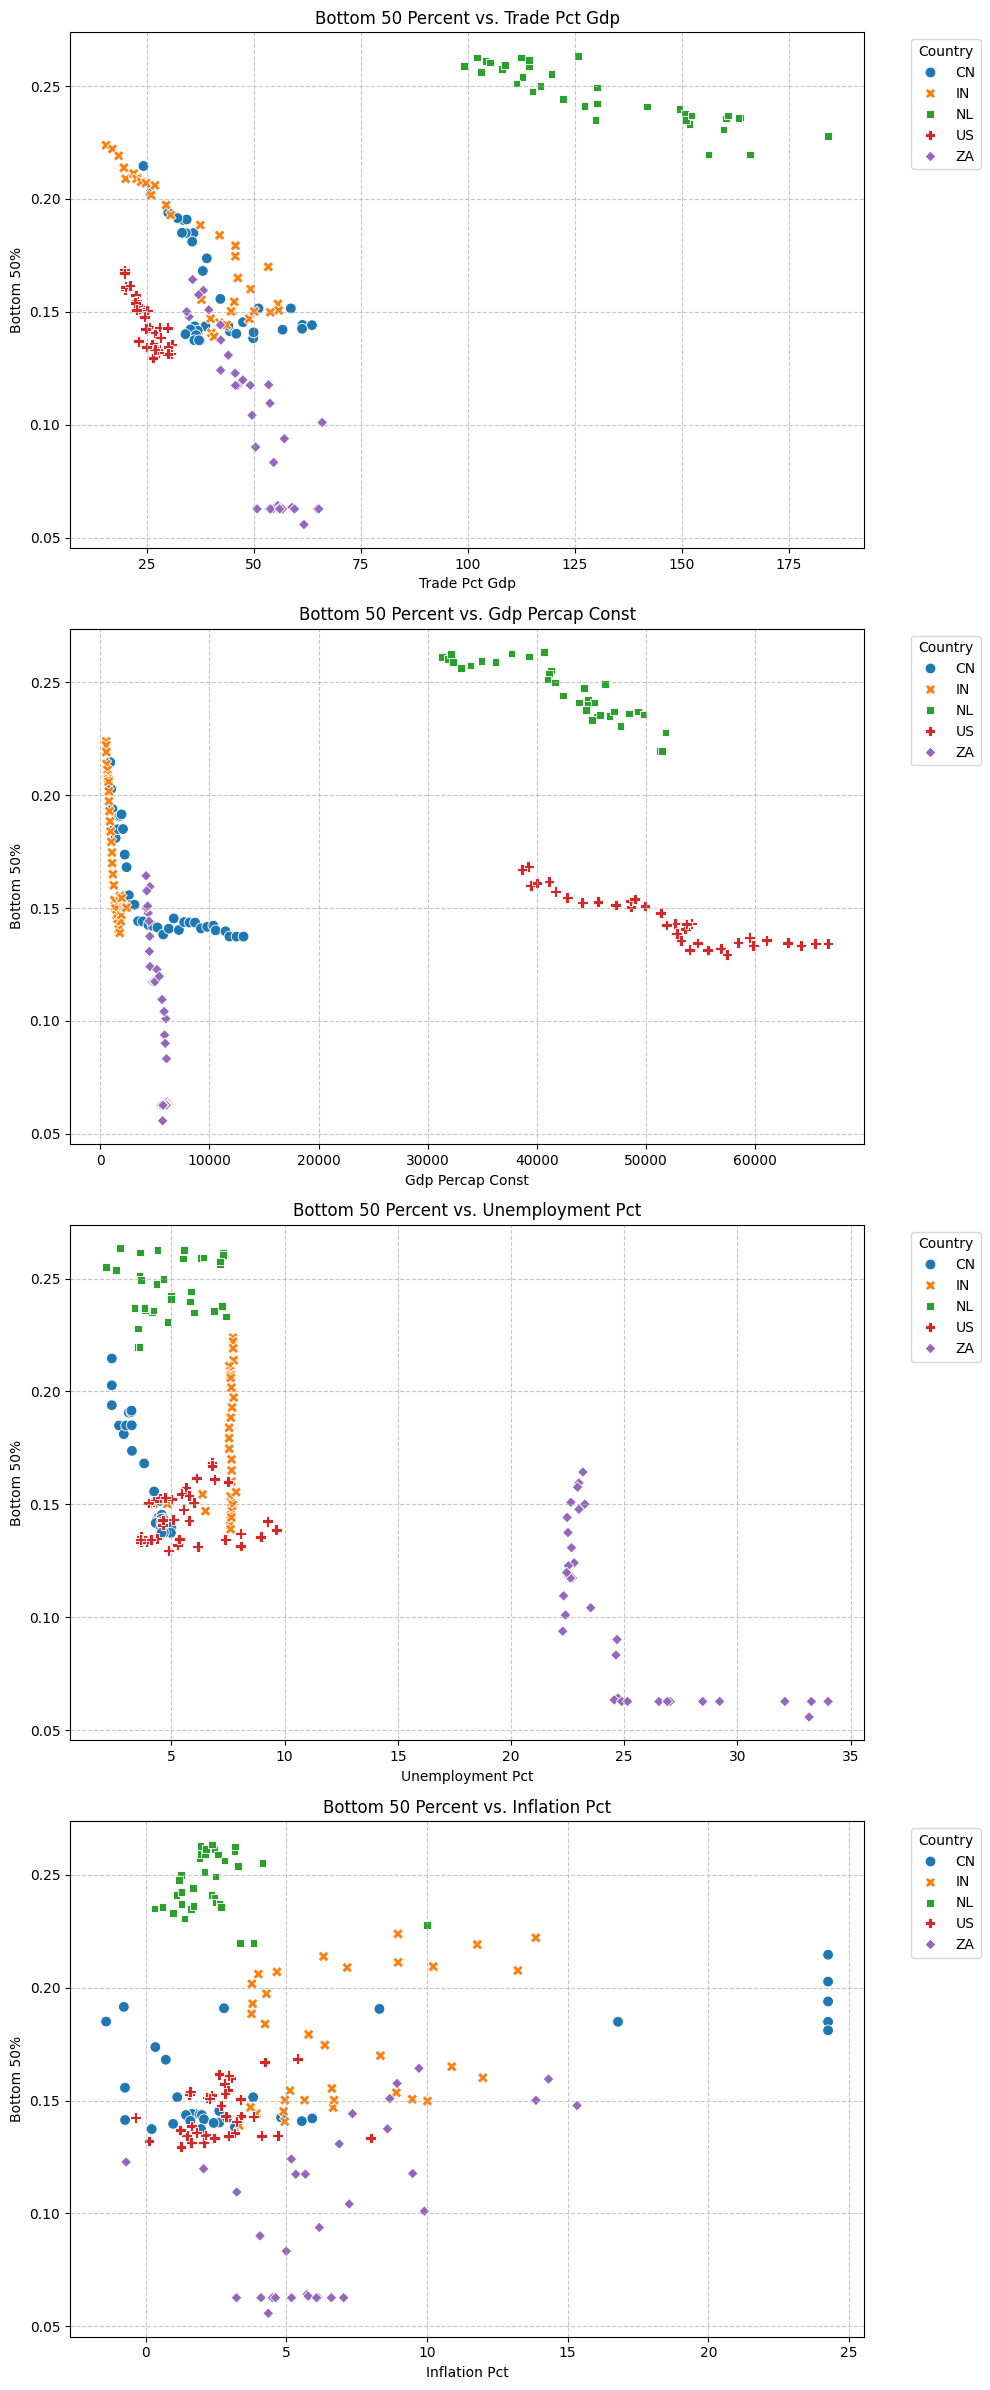

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables for the x-axis and the countries to plot
x_vars = ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
y_var = 'bottom_50%'
# The plan specifies CN, IN, US, NL, ZA.
countries_to_plot = ['CN', 'IN', 'US', 'NL', 'ZA']

# Filter the main dataframe for the selected countries
plot_df = df_merge[df_merge['country_code'].isin(countries_to_plot)]

# Create a figure with a grid of subplots for each x_var
fig, axes = plt.subplots(nrows=len(x_vars), ncols=1, figsize=(10, 6 * len(x_vars)), sharey=True)

# Ensure axes is an array even if there's only one subplot
if len(x_vars) == 1:
    axes = [axes]

for i, x_col in enumerate(x_vars):
    ax = axes[i]

    # Use seaborn scatterplot for better handling of groups
    sns.scatterplot(
        data=plot_df,
        x=x_col,
        y=y_var,
        hue='country_code',
        style='country_code', # Different markers for accessibility
        s=60, # Marker size
        ax=ax
    )

    ax.set_title(f'{y_var.replace("%", " Percent").replace("_", " ").title()} vs. {x_col.replace("_", " ").title()}')
    ax.set_xlabel(x_col.replace('_', ' ').title())
    ax.set_ylabel(y_var.replace('_', ' ').title())
    ax.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Task
For the selected countries (CN, IN, US, NL, ZA), prepare the dataset by filtering `df_merge` and dropping rows with missing values in the features (`trade_pct_gdp`, `gdp_percap_const`, `unemployment_pct`, `inflation_pct`) or the target (`top_10%`). Then, iterate through each country to train a Linear Regression model (80/20 train-test split) to predict the `top_10%` income share. For each model, calculate the Mean Squared Error (MSE) and R-squared, generate 'Actual vs. Predicted' plots for the test set, and display the model coefficients to identify key economic drivers of inequality.

## Prepare Data for Regression

### Subtask:
Filter the merged dataset for selected countries and remove rows with missing values in relevant columns.


**Reasoning**:
Filter the dataset for specific countries and remove missing values to prepare for regression analysis.



In [ ]:
countries_to_analyze = ['CN', 'IN', 'US', 'NL', 'ZA']
feature_cols = ['trade_pct_gdp', 'gdp_percap_const', 'unemployment_pct', 'inflation_pct']
target_col = 'top_10%'

# Filter for selected countries
df_ml = df_merge[df_merge['country_code'].isin(countries_to_analyze)].copy()

# Drop rows with missing values in features or target
df_ml = df_ml.dropna(subset=feature_cols + [target_col])

print(f"Shape of prepared data: {df_ml.shape}")
df_ml.head()

Shape of prepared data: (175, 13)


,country_code,year,bottom_50%,top_0.1%,top_1%,top_10%,country,gdp_percap_const,unemployment_pct,inflation_pct,national_income,trade_pct_gdp,population
0,CN,1990,0.2146,0.0319,0.0821,0.3085,China,917.270662,2.37,24.25699,3.625239e+11,24.225982,1135185000
1,CN,1991,0.2027,0.0328,0.0842,0.3150,China,989.548541,2.37,24.25699,3.852892e+11,25.872981,1150780000
2,CN,1992,0.1939,0.0343,0.0885,0.3271,China,1117.273295,2.37,24.25699,4.287159e+11,30.034094,1164970000
3,CN,1993,0.1849,0.0359,0.0929,0.3390,China,1258.349461,2.69,24.25699,4.456360e+11,35.908642,1178440000
4,CN,1994,0.1811,0.0371,0.0954,0.3433,China,1406.858457,2.90,24.25699,5.658946e+11,35.605464,1191835000


## Train and Evaluation

Train a Linear Regression model for each country, evaluate performance, and visualize results including coefficients.


## Hypothesis Testing for Linear Regression Models

To conduct a more formal hypothesis test on the significance of each feature's coefficient, we will use the `statsmodels` library. This library provides a comprehensive summary of the regression results, including p-values for each coefficient, which helps determine if there is a statistically significant relationship between the feature and the target variable.

In [ ]:
import statsmodels.api as sm

# Iterate through each country to perform OLS regression and hypothesis testing
for country in countries_to_analyze:
    print(f"--- Hypothesis Testing for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]

    # Define features and target
    X = country_df[feature_cols]
    y = country_df[target_col]

    # Add a constant to the independent variable for the intercept term
    X = sm.add_constant(X)

    # Create and fit the OLS model
    model_sm = sm.OLS(y, X).fit()

    # Print the summary of the regression results
    print(model_sm.summary())
    print("\n" + "="*80 + "\n")

--- Hypothesis Testing for CN ---
                            OLS Regression Results                            
Dep. Variable:                top_10%   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     430.0
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           5.11e-26
Time:                        06:01:18   Log-Likelihood:                 132.81
No. Observations:                  35   AIC:                            -255.6
Df Residuals:                      30   BIC:                            -247.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const 

## Concluding Analysis of Hypothesis Test

While the models generally demonstrate remarkable explanatory power (with R-squared values consistently above 0.96 for China, India, US, and South Africa), the individual significance and directional impacts of our chosen variables present a unique picture.

**Consistent Drivers of Top Income Share:**

*   **GDP per capita** emerges as a robust predictor across almost all nations. Its positive coefficients, often with very low p-values, confirm that per capita GDP is strongly correlated with an increasing inequality. This effect is particularly pronounced in developing economies like India and South Africa.

*   **Trade Percentage of GDP** also frequently shows a significant positive correlation, indicating that increased economic openness and trade activity tend to benefit the top income earners, especially evident in China and the US.

**Varying and Complex Relationships:**

*   **Unemployment Percentage** has a dual nature. In countries like China, India, and South Africa, higher unemployment significantly correlates with an *increase* in top 10%'s income share, suggesting that a weaker labor market might exacerbate income concentration.

    Conversely, in US, higher unemployment significantly correlated with a *decrease* in the top 10% share. This difference underscores diverse macroeconomic structures & social safety nets across nations.

*   **Inflation Percentage** has a varied impact. While largely non-significant in China, India, and the US, it shows a significant negative relationship in South Africa. This implies that for some economies, higher inflation may erode the real income share of the wealthiest, or at least not contribute to its growth as directly as other factors.

**Key Takeaways and Confidence:**

We can be highly confident (p < 0.05, often p < 0.001) in the significant influence of GDP per capita, trade and unemployment on the top 10% income share.

The consistent presence of multicollinearity, however, advises caution in isolating the precise magnitude of each individual coefficient's effect, suggesting that these economic factors often move in tandem.

### Removing Insignificant features for each country based on Hypothesis Test:

In [ ]:
# P-value thresholds for exclusion (based on previous OLS summary)
# Features with p-value > 0.1 will be excluded for each country
exclusion_map = {
    'CN': ['inflation_pct'], # inflation_pct p-value: 0.220
    'IN': ['inflation_pct'], # inflation_pct p-value: 0.850
    'US': ['inflation_pct'], # inflation_pct p-value: 0.272
    'NL': ['inflation_pct'], # inflation_pct p-value: 0.770
    'ZA': ['trade_pct_gdp'] # trade_pct_gdp p-value: 0.136
}

### Training the model & evaluate its MSE

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import statsmodels.api as sm

models = {}
plot_data = [] # List to store data for plotting

# Iterate through each country
for country in countries_to_analyze:
    print(f"--- Analysis for {country} ---")

    # Filter data for the current country
    country_df = df_ml[df_ml['country_code'] == country]

    # Check if there is enough data points
    if len(country_df) < 5:
        print(f"Not enough data to train model for {country} (n={len(country_df)})")
        continue

    # Determine which features to use based on p-value exclusion
    features_to_exclude = exclusion_map.get(country, [])
    current_feature_cols = [f for f in feature_cols if f not in features_to_exclude]

    if not current_feature_cols:
        print(f"No features left for {country} after exclusion. Skipping model training.")
        continue

    # Define features and target
    X = country_df[current_feature_cols]
    y = country_df[target_col]

    print(f"Using features for {country}: {current_feature_cols}")

    # Initialize and fit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[country] = model

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.6f}")
    print(f"R-squared: {r2:.4f}")

    # Coefficients
    coef_df = pd.DataFrame({
        'Feature': current_feature_cols,
        'Coefficient': model.coef_
    })
    print("\nModel Coefficients:")
    display(coef_df)

    # Store data for plotting later
    plot_data.append({
        'country': country,
        'y_test': y_test,
        'y_pred': y_pred
    })
    print("\n" + "="*40 + "\n")

--- Analysis for CN ---
Mean Squared Error: 0.000043
R-squared: 0.2933

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.013721
1,gdp_percap_const,0.018260
2,unemployment_pct,0.020003
3,inflation_pct,0.001630




--- Analysis for IN ---
Mean Squared Error: 0.000130
R-squared: 0.9571

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.026594
1,gdp_percap_const,0.074880
2,unemployment_pct,0.021543
3,inflation_pct,-0.000474




--- Analysis for US ---
Mean Squared Error: 0.000016
R-squared: 0.9265

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.006616
1,gdp_percap_const,0.019284
2,unemployment_pct,-0.001467
3,inflation_pct,-0.001121




--- Analysis for NL ---
Mean Squared Error: 0.000022
R-squared: -0.8865

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,-0.005694
1,gdp_percap_const,0.016446
2,unemployment_pct,0.002691
3,inflation_pct,0.000136




--- Analysis for ZA ---
Mean Squared Error: 0.000174
R-squared: 0.8658

Model Coefficients:


,Feature,Coefficient
0,trade_pct_gdp,0.005545
1,gdp_percap_const,0.050937
2,unemployment_pct,0.017614
3,inflation_pct,-0.009459


### Evaluation of Models: Actual vs. Predicted Plots

These plots visualize the performance of our Linear Regression models for each country. For each graph:

*   **X-axis (Actual Top 10% Share)**: Represents the true 'top 10%' income share values from the test dataset.
*   **Y-axis (Predicted Top 10% Share)**: Shows the 'top 10%' income share values predicted by our trained model.
*   **Blue Dots**: Each dot corresponds to an actual data point from the test set, with its predicted value on the Y-axis.
*   **Red Dashed Line**: This diagonal line represents a 'perfect prediction' scenario, where `Actual = Predicted`. The closer the blue dots are to this red line, the better the model's accuracy.

These plots help us visually assess how well each country's model generalizes to unseen data, indicating areas where predictions are accurate and where there might be discrepancies.

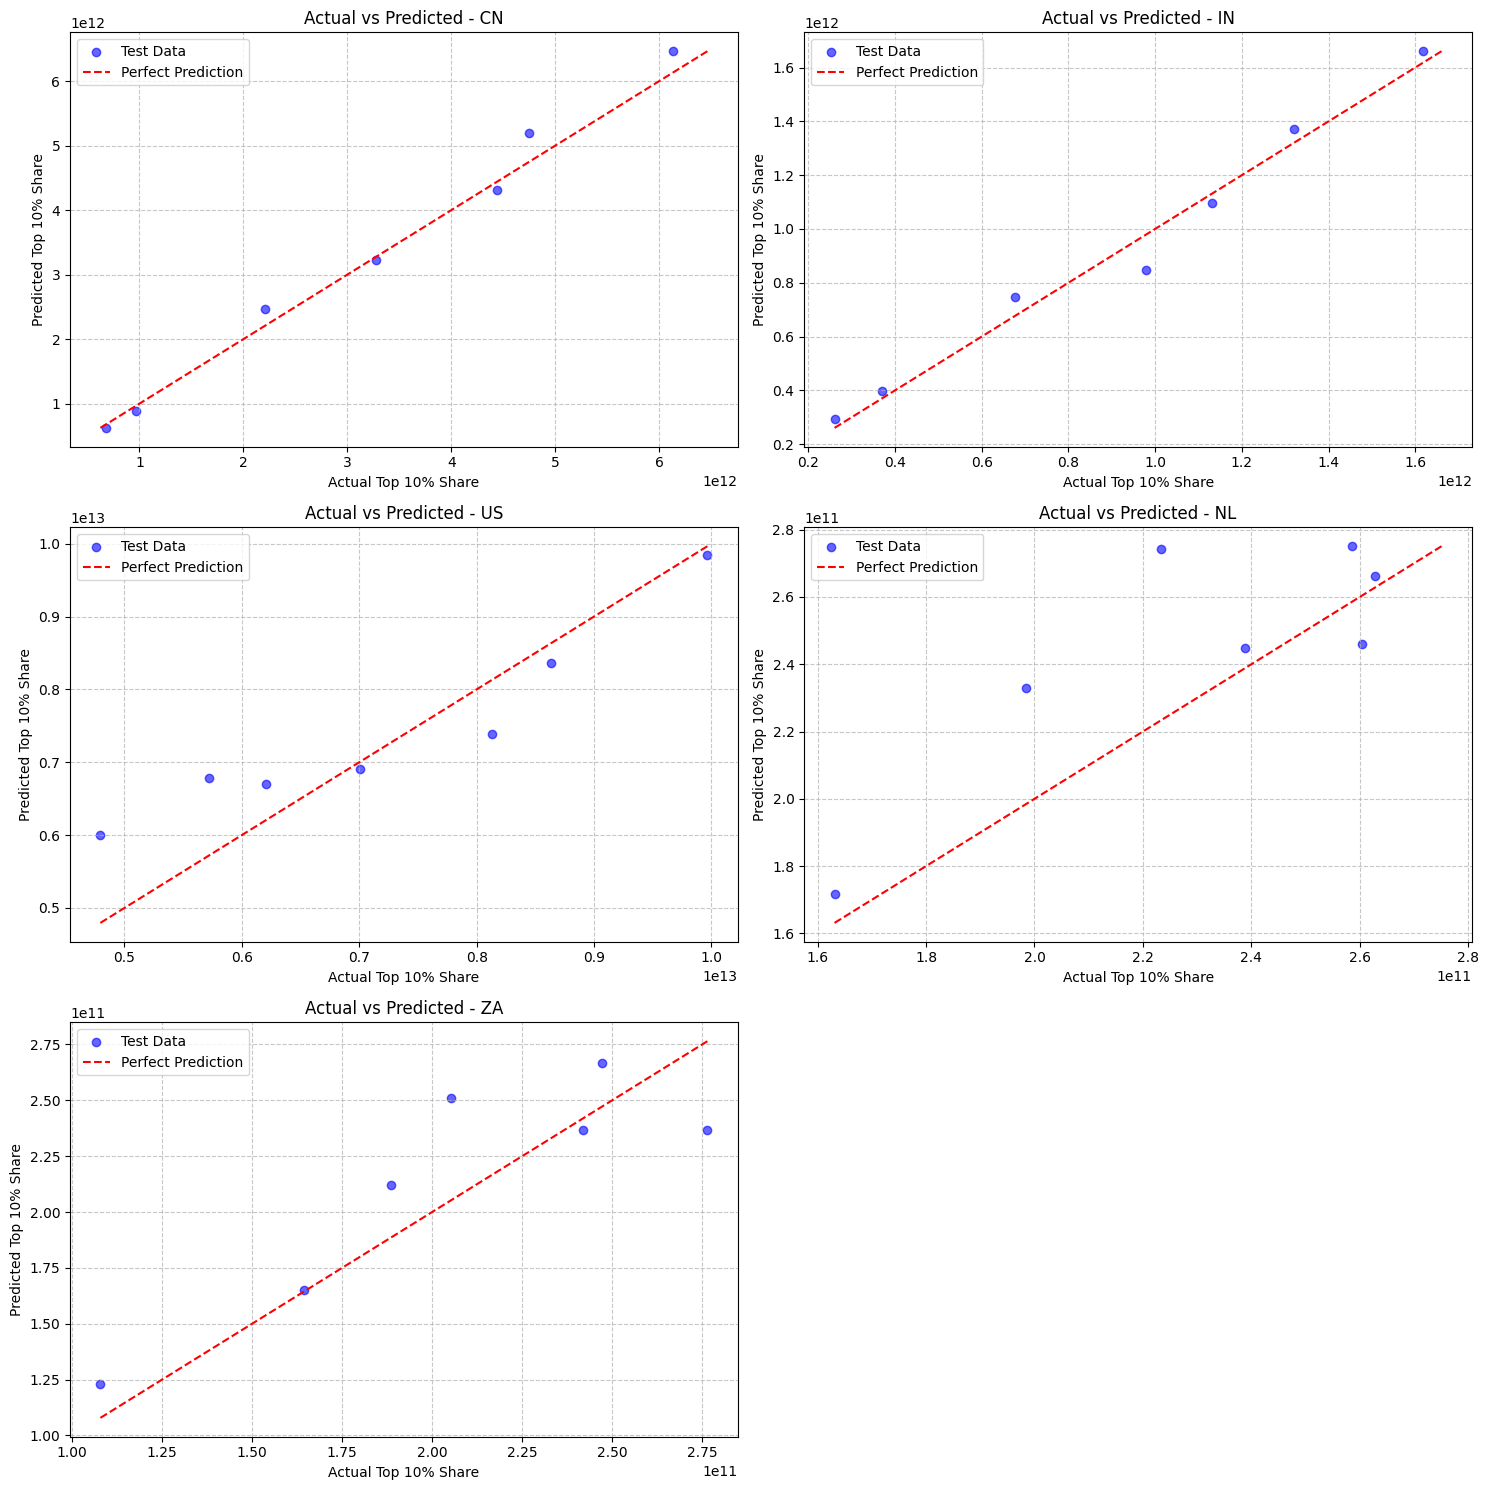

In [ ]:
# Plot of 'Actual vs Predicted' graph of the countries
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, data in enumerate(plot_data):
    ax = axes[i]
    country = data['country']
    y_test = data['y_test']
    y_pred = data['y_pred']

    ax.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Test Data')

    # Plot diagonal line for reference
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

    ax.set_xlabel('Actual Top 10% Share')
    ax.set_ylabel('Predicted Top 10% Share')
    ax.set_title(f'Actual vs Predicted - {country}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Conclusion**: Leveraging the Model for Policy-Making to Combat Inequality

Our analysis and the developed Linear Regression models provide a powerful tool for understanding and simulating the proportion of wealth held by the top 10% richest individuals, which serves as a key indicator of income inequality within a country. By identifying the significant economic drivers—such as GDP per capita, trade percentage of GDP, and unemployment rates—these models offer a data-driven lens into the mechanisms that influence income concentration.


**Governments can utilize these models for:**

1.  **Forecasting Inequality Trends**: By inputting projected values for economic indicators, policymakers can simulate potential future scenarios for Wealth Inequality which allows governments to anticipate rising inequality and proactive policy interventions.
2.  **Impact Assessment of Economic Policies**: Before implementing new economic policies, their potential impact on income inequality can be assessed.
3.  **Targeted Interventions**: Helps understand which economic factors drive inequality in a country (determined by model's coeff & p-values) & enables govts. to design more effective interventions. For example, if unemployment significantly exacerbates the top 10% share (as in China, India, and SA), policies focused on job creation and social safety nets become critical.
4.  **Evidence-Based Decision Making**: By demonstrating the quantitative relationship between macroeconomic factors and income concentration, governments can advocate for policies with a clearer understanding of their expected outcomes.

---
# Rough Work

---